# Pandas

In [1]:
import pandas as pd
import numpy as np

# Series class
- Numpy에서 제공하는 1차원 배열과 모양이 비슷
- 각 데이터의 의미를 표시하는 index를 붙일 수 있음
- 데이터 자체는 값(value) -> iterable, 배열, scalar value, dict

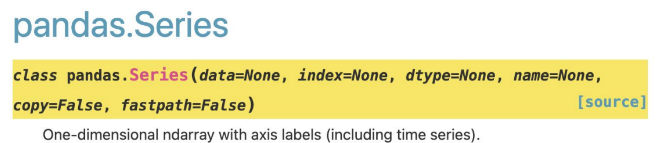

In [2]:
series = pd.Series(['하나', '둘', '셋', '넷', '다섯',
                   '여섯', '일곱', '여덟', '아홉', '열'],
                  index = [_ for _ in range(1,11)])
series

1     하나
2      둘
3      셋
4      넷
5     다섯
6     여섯
7     일곱
8     여덟
9     아홉
10     열
dtype: object

## Series 생성하기

In [3]:
s = pd.Series([9_904_312, 3_448_737, 2_890_451, 2_466_052],
              index = ['서울', '부산', '인천', '대구'])
s

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

In [4]:
# 연습 문제
s2 = pd.Series(range(10,100,10), index = range(9))

In [5]:
s2

0    10
1    20
2    30
3    40
4    50
5    60
6    70
7    80
8    90
dtype: int64

In [6]:
# index를 지정하지 않고 만들면 0부터 시작하는 정수 값이 됨.
pd.Series(range(10,14))

0    10
1    11
2    12
3    13
dtype: int64

In [7]:
# index는 'index'3 속성으로 접근 가능
s.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [8]:
# value는 1차원 배열이며 'values' 속성으로 접근 가능
s.values

array([9904312, 3448737, 2890451, 2466052], dtype=int64)

In [9]:
pd.Series()

C:\Users\user\AppData\Local\Temp\ipykernel_6232\2031691219.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series()


Series([], dtype: float64)

In [10]:
# 연습 문제
len(s2[s2.values>50])

4

In [11]:
# 풀이
sum(s2.values>50)

4

In [12]:
# name 속성을 이용하여 Series데이터 이름 삽입 가능
# index.name 속성 이용하여 index에 이름 삽입 가능
s.name = "인구"
s.index.name = "도시"
s

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [13]:
# dict
d = {'a':1, 'b':2, 'c':3}
ser = pd.Series(data=d, index=['a','b','c'])
ser

a    1
b    2
c    3
dtype: int64

** dict 일 때 index가 최초에 dict의 key로 만들어져 있고, Series는 index키워드로 전달받은 인수로 index를 재할당함. 그래서, 밑에 예제와 같이 Series 객체의 값이 NaN의 결과를 출력하는 것을 확인 가능.

* Nan 값이 float 자료형에서만 표현 가능하므로 결과가 float 자료형이 되었다는 점에 주의

In [14]:
d = {'a':1, 'b':2, 'c':3}
ser = pd.Series(data=d, index=['x','y','z'])
ser

x   NaN
y   NaN
z   NaN
dtype: float64

In [15]:
# 연습 문제
social = pd.Series([88,95,100,67], index=['철수','영희','길동','몽룡'])
social

철수     88
영희     95
길동    100
몽룡     67
dtype: int64

## Series index를 속성처럼 활용
    -> label값이 공백없는 문자열인 경우 index label이 속성인 것처럼 마침표(.)를 활용하여 해당 index값에 접근 가능

In [16]:
d = {'a':1, 'b':2, 'c':3}
ser = pd.Series(data=d, index=['a','b','c'])
ser

a    1
b    2
c    3
dtype: int64

In [17]:
ser.a, ser.b, ser.c

(1, 2, 3)

In [18]:
e = pd.Series({'가나다': 1})
e

가나다    1
dtype: int64

In [19]:
e.가나다

1

## 특징
    -> index label을 키(key)로 사용하기에 딕셔너리 자료형과 비슷한 특징

In [20]:
"서울" in s # 인덱스 레이블 중에 서울이 있는가?

True

In [21]:
"대전" in s # 인덱스 레이블 중에 대전이 있는가?

False

In [22]:
for k, v in s.items():
    print(f'{k}, {v}')

서울, 9904312
부산, 3448737
인천, 2890451
대구, 2466052


In [23]:
test = dict(zip(range(10), list("영일이삼사오육칠팔구")))
test

{0: '영',
 1: '일',
 2: '이',
 3: '삼',
 4: '사',
 5: '오',
 6: '육',
 7: '칠',
 8: '팔',
 9: '구'}

In [24]:
# dict
for k, v in test.items():
    print(f'{k}, {v}')

0, 영
1, 일
2, 이
3, 삼
4, 사
5, 오
6, 육
7, 칠
8, 팔
9, 구


In [25]:
# 연습문제
for k, v in s.items():
    if v > 3_000_000:
        print(f'{k}의 인구는 300만이 넘습니다.')

서울의 인구는 300만이 넘습니다.
부산의 인구는 300만이 넘습니다.


In [26]:
[f'{k}의 인구는 300만이 넘습니다.' for k, v in s.items() if v > 3_000_000]

['서울의 인구는 300만이 넘습니다.', '부산의 인구는 300만이 넘습니다.']

## Series 연산
    * Series의 value에만 적용/ index값은 변하지 x

In [27]:
s / 1_000_000

도시
서울    9.904312
부산    3.448737
인천    2.890451
대구    2.466052
Name: 인구, dtype: float64

## Series 인덱싱

    -> 자료의 순서를 바꾸거나 특정한 자료만 취사 선택 가능

In [28]:
s[1], s['부산']

(3448737, 3448737)

In [29]:
s[3], s['대구']

(2466052, 2466052)

In [30]:
s[[0,3,1]]

도시
서울    9904312
대구    2466052
부산    3448737
Name: 인구, dtype: int64

In [31]:
s[['서울', '대구', '부산']]

도시
서울    9904312
대구    2466052
부산    3448737
Name: 인구, dtype: int64

In [32]:
# 단 하나의 값을 시리즈 형태로 가져오고 싶다 -> 값이 하나인 리스트로 인덱싱 작성
s[[0]]

도시
서울    9904312
Name: 인구, dtype: int64

In [33]:
# 연습 문제
s[['인천']]

도시
인천    2890451
Name: 인구, dtype: int64

## Series 슬라이싱
    * 단, 문자열 label을 이용한 슬라이싱을 이용한 경우에는 숫자 인덱싱과 달리 콜론(:) 기호 뒤에 오는 것도 결과에 포함

In [34]:
s[1:3] # 두번째(1)부터 세번째(2)까지 (네번째(3) 미포함)

도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64

In [35]:
s['부산':'대구'] # 부산에서 대구까지 (대구도 포함)

도시
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

## Series index 기반 연산

In [36]:
s2 = pd.Series({'서울':9_631_482, '부산': 3_393_191, '인천': 2_632_035, '대전': 1_490_158})
s2

서울    9631482
부산    3393191
인천    2632035
대전    1490158
dtype: int64

In [37]:
ds = s - s2
ds

대구         NaN
대전         NaN
부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64

In [38]:
np.nan - 20

nan

### Series에서 값이 NaN인지 확인
    -> isnull() method

In [39]:
ds.isnull()

대구     True
대전     True
부산    False
서울    False
인천    False
dtype: bool

### Series에서 값이 NaN이 아닌지 확인
    -> notnull() method

In [40]:
ds.notnull()

대구    False
대전    False
부산     True
서울     True
인천     True
dtype: bool

### Series에서 NaN이 아닌 값만 인덱싱으로 구하기

In [41]:
ds[ds.notnull()]

부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64

In [42]:
s[s>3_000_000]

도시
서울    9904312
부산    3448737
Name: 인구, dtype: int64

### Series에서 NaN이 아닌 값 구하기

In [43]:
s # 2015년 도시별 인구

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [44]:
s2 # 2010년 도시별 인구

서울    9631482
부산    3393191
인천    2632035
대전    1490158
dtype: int64

In [45]:
rs = (s - s2) / s2 * 100
rs = rs[rs.notnull()]
rs

부산    1.636984
서울    2.832690
인천    9.818107
dtype: float64

In [46]:
# 연습문제
s3 = (s - s2)
s3

s3_result = s3.max()
s3_result

s3[s3 == s3_result]

서울    272830.0
dtype: float64

In [47]:
# 풀이 => nan 값을 제외한 인덱싱 찾아 결과 산출
ds = s - s2 
ds = ds[ds.notnull()]
ds[[ds.values.argmax()]]

서울    272830.0
dtype: float64

## Series 데이터 추가, 갱신, 삭제

In [48]:
rs["부산"] = 1.63

In [49]:
rs

부산    1.630000
서울    2.832690
인천    9.818107
dtype: float64

In [50]:
# 연습 문제
# 인덱싱
rs['서울'] = 2.83
rs['인천'] = 9.82

In [51]:
# 슬라이싱
rs[1:2] = 2.84
rs[2:3] = 9.81

In [52]:
# 풀이 
rs['서울':'인천'] = (2.83, 9.82)

In [53]:
rs

부산    1.63
서울    2.83
인천    9.82
dtype: float64

In [54]:
del rs['서울']
rs

부산    1.63
인천    9.82
dtype: float64

In [56]:
# 연습문제 
fin1 = {'카카오':60010, '삼성전자':61000, 'LG전자':90000}
fin2_value = [60200, 61200,200100]
fin2_index = ['카카오','삼성전자','네이버']

In [56]:
ser_finance1 = pd.Series(fin1)
ser_finance2 = pd.Series(fin2_value, index=fin2_index)

In [57]:
ser_finance1

카카오     60010
삼성전자    61000
LG전자    90000
dtype: int64

In [58]:
ser_finance2

카카오      60200
삼성전자     61200
네이버     200100
dtype: int64

In [ ]:
# 연습문제
ser_finance1 - ser_finance2

In [ ]:
ser_finance1 + ser_finance2

In [ ]:
ser_finance1 * ser_finance2

In [ ]:
ser_finance1 / ser_finance2

-> 연산 후의 결과값에 NaN 값이 포함되어있어서

In [63]:
type(np.nan)

float

In [64]:
# 연습 문제

result = ser_finance1 - ser_finance2
result

LG전자      NaN
네이버       NaN
삼성전자   -200.0
카카오    -190.0
dtype: float64

In [66]:
result = ser_finance1 - ser_finance2
result[pd.notnull(result)]

삼성전자   -200.0
카카오    -190.0
dtype: float64

## DataFrame class
    -> label된 row와 column, 두 개의 축을 갖는 데이터 구조
    -> 산술 연산은 row와 column 모두 적용
    -> Series 객체를 갖는 dictionary
    
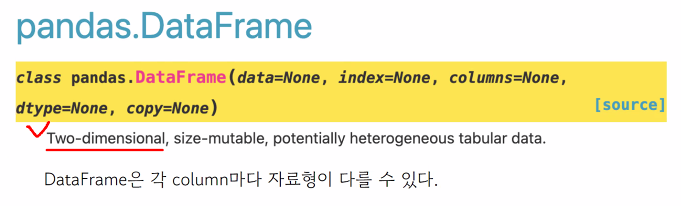

### DataFrame 생성

In [70]:
d = {'col1': [1,2], 'col2': [3,4]}
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4


In [97]:
data = {
    "2015" : [9904312, 3448737, 2890451, 2466052],
    "2010" : [9631482, 3393191, 2632035, 2431774],
    "2005" : [9762546, 3512547, 2517680, 2456016],
    "2000" : [9853972, 3655437, 2466338, 2473990],
    "지역" : ["수도권", "경상권", "수도권", "경상권"],
    "2010-2015 증가율" :[0.0283, 0.0163, 0.0982, 0.0141]
}
columns = ["지역", "2015", "2010", "2005", "2000", "2010-2015 증가율"]
index = ["서울", "부산", "인천", "대구"]
df = pd.DataFrame(data, index = index, columns = columns)
df

,지역,2015,2010,2005,2000,2010-2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [98]:
df.dtypes

지역                object
2015               int64
2010               int64
2005               int64
2000               int64
2010-2015 증가율    float64
dtype: object

### Dataframe의 속성 values, columns, index

In [99]:
df.values

array([['수도권', 9904312, 9631482, 9762546, 9853972, 0.0283],
       ['경상권', 3448737, 3393191, 3512547, 3655437, 0.0163],
       ['수도권', 2890451, 2632035, 2517680, 2466338, 0.0982],
       ['경상권', 2466052, 2431774, 2456016, 2473990, 0.0141]], dtype=object)

In [100]:
df.columns

Index(['지역', '2015', '2010', '2005', '2000', '2010-2015 증가율'], dtype='object')

In [101]:
df.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

### Dataframe 이름 붙이기

In [102]:
df.index.name = "도시"
df.columns.name = "특성"
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [81]:
# 
kbo_pitcher = pd.read_csv('kbo_pitcher.csv', encoding='utf-8')
kbo_pitcher

,순위,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,IP,H,HR,BB,HBP,SO,R,ER,WHIP
0,1,안우진,키움,2.11,30,15,8,0,0,0.652,196,131,4,55,4,224,51,46,0.95
1,2,김광현,SSG,2.13,28,13,3,0,0,0.813,173 1/3,141,10,45,5,153,48,41,1.07
2,3,플럿코,LG,2.39,28,15,5,0,0,0.750,162,125,13,38,2,149,53,43,1.01
3,4,수아레즈,삼성,2.49,30,6,8,0,0,0.429,173 2/3,151,7,50,4,159,61,48,1.16
4,5,켈리,LG,2.54,27,16,4,0,0,0.800,166 1/3,144,10,35,2,153,50,47,1.08
5,6,요키시,키움,2.57,30,10,8,0,0,0.556,185 1/3,169,8,33,5,154,61,53,1.09
6,7,폰트,SSG,2.69,28,13,6,0,0,0.684,184,141,18,34,6,170,63,55,0.95
7,8,루친스키,NC,2.97,31,10,12,0,0,0.455,193 2/3,184,14,34,8,194,77,64,1.13
8,9,뷰캐넌,삼성,3.04,26,11,8,0,0,0.579,160,176,10,39,8,117,61,54,1.34
9,10,소형준,KT,3.05,27,13,6,0,0,0.684,171 1/3,158,8,39,5,117,68,58,1.15


In [82]:
kbo_pitcher.dtypes

순위        int64
선수명      object
팀명       object
ERA     float64
G         int64
W         int64
L         int64
SV        int64
HLD       int64
WPCT    float64
IP       object
H         int64
HR        int64
BB        int64
HBP       int64
SO        int64
R         int64
ER        int64
WHIP    float64
dtype: object

In [91]:
# 
data = {
    '순위': range(1,23),
    '선수명': ['안우진','김광현','플럿코','수아레즈','켈리','요키시','폰트','루친스키','뷰캐넌','소형준','고영표','스탁','최원준','반즈','곽빈','양현종','이의리','박세웅','원태인','김민우','오원석','데스파이네'],
    '팀명': ['키움','SSG','LG','삼성','LG','키움','SSG','NC','삼성','KT','KT','두산','두산','롯데','두산','KIA','KIA','롯데','삼성','한화','SSG','KT'],
    '평균자책점': [2.11,2.13,2.39,2.49,2.54,2.57,2.69,2.97,3.04,3.05,3.2,3.6,3.6,3.62,3.78,3.85,3.86,3.89,3.92,4.36,4.5,4.53]
}
index = range(1,23)
columns = ['순위','선수명','팀명','평균자책점']

kbo_pitcher_2 = pd.DataFrame(data, columns = columns, index=index)
                             
    
kbo_pitcher_2

,순위,선수명,팀명,평균자책점
1,1,안우진,키움,2.11
2,2,김광현,SSG,2.13
3,3,플럿코,LG,2.39
4,4,수아레즈,삼성,2.49
5,5,켈리,LG,2.54
6,6,요키시,키움,2.57
7,7,폰트,SSG,2.69
8,8,루친스키,NC,2.97
9,9,뷰캐넌,삼성,3.04
10,10,소형준,KT,3.05


## DataFrame 전치(Tranpose) 

In [92]:
kbo_pitcher_2.T

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
순위,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
선수명,안우진,김광현,플럿코,수아레즈,켈리,요키시,폰트,루친스키,뷰캐넌,소형준,...,최원준,반즈,곽빈,양현종,이의리,박세웅,원태인,김민우,오원석,데스파이네
팀명,키움,SSG,LG,삼성,LG,키움,SSG,NC,삼성,KT,...,두산,롯데,두산,KIA,KIA,롯데,삼성,한화,SSG,KT
평균자책점,2.11,2.13,2.39,2.49,2.54,2.57,2.69,2.97,3.04,3.05,...,3.6,3.62,3.78,3.85,3.86,3.89,3.92,4.36,4.5,4.53


In [103]:
df['2010-2015 증가율'] = df['2010-2015 증가율'] * 100
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83
부산,경상권,3448737,3393191,3512547,3655437,1.63
인천,수도권,2890451,2632035,2517680,2466338,9.82
대구,경상권,2466052,2431774,2456016,2473990,1.41


## DataFrame column 추가,갱신 삭제

In [104]:
df['2005-2010 증가율'] = ((df['2010'] - df['2005'])/ df['2005'] * 100).round(2)
df

특성,지역,2015,2010,2005,2000,2010-2015 증가율,2005-2010 증가율
도시,,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,2.83,-1.34
부산,경상권,3448737,3393191,3512547,3655437,1.63,-3.40
인천,수도권,2890451,2632035,2517680,2466338,9.82,4.54
대구,경상권,2466052,2431774,2456016,2473990,1.41,-0.99


In [105]:
del df['2010-2015 증가율']
df

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40
인천,수도권,2890451,2632035,2517680,2466338,4.54
대구,경상권,2466052,2431774,2456016,2473990,-0.99


## DataFrame column 인덱싱
    -> column label을 키로, column Series를 값으로 가지는 딕셔너리와 비슷
 

In [106]:
# 하나의 column만 인덱싱하면 Series가 반환된다.
df['지역']

도시
서울    수도권
부산    경상권
인천    수도권
대구    경상권
Name: 지역, dtype: object

In [107]:
# 2010이라는 column을 반환하면서 Series 자료형으로 반환
df['2010']

도시
서울    9631482
부산    3393191
인천    2632035
대구    2431774
Name: 2010, dtype: int64

In [108]:
type(df['2010'])

pandas.core.series.Series

In [109]:
# 여러 개의 column을 인덱싱하면 부분적인 DataFrame이 반환된다.
df[['2010','2015']]

특성,2010,2015
도시,,
서울,9631482,9904312
부산,3393191,3448737
인천,2632035,2890451
대구,2431774,2466052


In [110]:
# 2010이라는 column을 반환하면서 DataFrame 자료형을 유지
df[['2010']]

특성,2010
도시,
서울,9631482
부산,3393191
인천,2632035
대구,2431774


In [111]:
type(df[['2010']])

pandas.core.frame.DataFrame

In [112]:
# 정수 index를 column 인덱싱에 사용할 수 없다.
df[1]

KeyError: 1

* 별도의 columns 키워드 인수를 전달하지 않으면 RangeIndex를 기본값으로 부여합니다.

In [113]:
df2 = pd.DataFrame(np.arange(12).reshape(3,4))
df2

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [114]:
df2[2]

0     2
1     6
2    10
Name: 2, dtype: int32

In [115]:
df2[[1,2]]

,1,2
0,1,2
1,5,6
2,9,10


## DataFrame row 슬라이싱
    -> row 단위 인덱싱을 하고자 하면 항상 슬라이싱
    -> index 값이 문자 label이면 label 슬라이싱도 가능

In [116]:
df

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34
부산,경상권,3448737,3393191,3512547,3655437,-3.40
인천,수도권,2890451,2632035,2517680,2466338,4.54
대구,경상권,2466052,2431774,2456016,2473990,-0.99


In [118]:
df[:1] # df['서울'] --> 문자는 포함, 숫자는 미포함

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34


In [119]:
df[1:2]

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
부산,경상권,3448737,3393191,3512547,3655437,-3.4


In [120]:
df['부산':'부산']

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
부산,경상권,3448737,3393191,3512547,3655437,-3.4


## DataFrame row 인덱싱할 경우
    -> row 단위로 인덱싱을 하면 KeyError 발생

In [121]:
df[['서울']

KeyError: "None of [Index(['서울'], dtype='object', name='특성')] are in the [columns]"

## DataFrame 개별 데이터 인덱싱

In [123]:
df['2015']['서울']

9904312

In [124]:
type(df['2015']['서울'])

numpy.int64

### -> * 역순은 가능?

In [125]:
df['서울':'서울']

특성,지역,2015,2010,2005,2000,2005-2010 증가율
도시,,,,,,
서울,수도권,9904312,9631482,9762546,9853972,-1.34


In [126]:
df['서울':'서울']['2015']

도시
서울    9904312
Name: 2015, dtype: int64

In [127]:
type(df['서울':'서울']['2015'])

pandas.core.series.Series

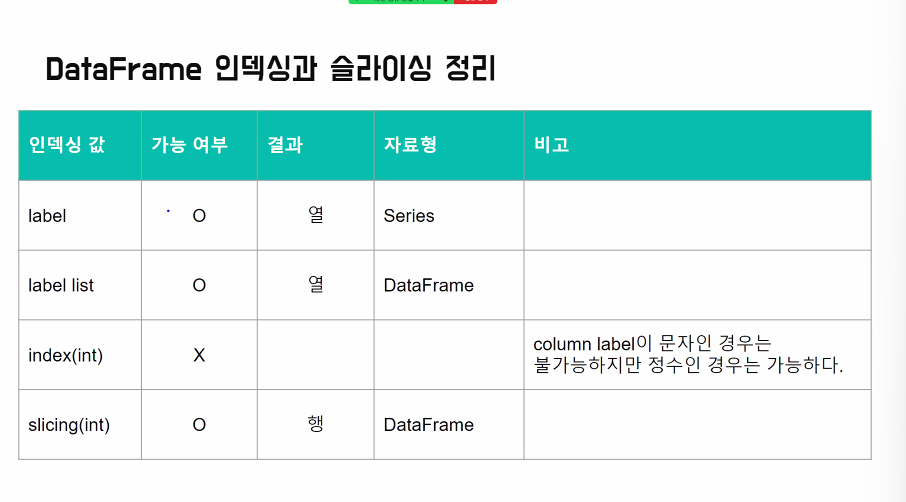

In [161]:
# 연습문제
data = {
    '국어': [80,90,70,30],
    '영어': [90,70,60,40],
    '수학': [90,60,80,70],
}

columns = ['국어', '영어', '수학']
index = ['춘향', '몽룡', '향단', '방자']
df = pd.DataFrame(data, index=index, columns=columns)
df

In [161]:
# 1) 모든 학생의 수학 점수를 Series로 나타낸다.
df['수학']

In [161]:
# 2) 모든 학생의 국어와 영어 점수를 데이터프레임으로 나타낸다.
df[['국어','영어']]

In [161]:
# 3) 모든 학생의 각 과목 평균 점수를 새로운 열을 추가한다.
df['평균'] = (df['수학'] + df['국어'] + df['영어'])/ 3
df

In [161]:
# 4) 춘향의 점수를 DataFrame으로 나타낸다.
df[df.index == '춘향']

# 풀이
df[:1] # or df['춘향':'춘향']

In [161]:
# 5) 향단의 점수를 Series로 나타낸다.
df.T['향단']

In [164]:
# 연습 문제
np.random.seed(0)
result = pd.DataFrame(np.random.randn(6,4), 
                      index=pd.date_range('20130226', periods=6),
                      columns=['A','B','C','D'])
result

,A,B,C,D
2013-02-26,1.764052,0.400157,0.978738,2.240893
2013-02-27,1.867558,-0.977278,0.950088,-0.151357
2013-02-28,-0.103219,0.410599,0.144044,1.454274
2013-03-01,0.761038,0.121675,0.443863,0.333674
2013-03-02,1.494079,-0.205158,0.313068,-0.854096
2013-03-03,-2.552990,0.653619,0.864436,-0.742165
